In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

In [3]:
CLEARED_PATH = './flats_cleared.csv'
df = pd.read_csv(CLEARED_PATH, index_col='Код объекта')
df

,Комнатность,Ремонт,Балкон,Материал окон,Серия,Год постройки,Стены,url,Адрес,наземный паркинг,...,культуры,пешеходные бульвары,дороги,трассы,автомобильные мосты,Высота потолков,Общая площадь,этаж,всего этажей,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,1,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2017.0,Панельные,https://ptz.etagi.com//realty/5757236/,Древлянка,1,...,0,0,0,0,0,2.50,30.60,1,5,2390.0
5535905,1,Косметический ремонт,Нет балкона,Пластиковые,Общ,NaN,Кирпичные,https://ptz.etagi.com//realty/5535905/,Голиковка,0,...,0,0,0,0,0,2.55,18.00,4,5,920.0
4644398,3,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,https://ptz.etagi.com//realty/4644398/,Древлянка,1,...,0,0,0,0,0,2.70,57.83,3,5,3250.0
5667276,2,Косметический ремонт,Лоджия,Пластиковые,Инд,2016.0,Монолитные,https://ptz.etagi.com//realty/5667276/,Ключевая,1,...,0,0,0,0,0,2.70,41.20,8,16,3590.0
4644417,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,https://ptz.etagi.com//realty/4644417/,Древлянка,1,...,0,0,0,0,0,2.70,84.00,3,5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671111,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,2012.0,Панельные,https://ptz.etagi.com//realty/4671111/,Ключевая,1,...,0,0,0,0,0,2.50,36.60,3,5,2900.0
2886457,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2018.0,Монолитные,https://ptz.etagi.com//realty/2886457/,Центр,0,...,0,0,0,0,0,3.00,103.30,9,9,8990.0
5193363,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,1963.0,Кирпичные,https://ptz.etagi.com//realty/5193363/,Октябрьский,1,...,0,0,0,0,0,2.50,30.60,1,5,2350.0


In [4]:
df.isnull().mean() * 100

Комнатность               0.000000
Ремонт                    0.000000
Балкон                    0.000000
Материал окон             0.000000
Серия                     0.000000
Год постройки            22.554348
Стены                     0.000000
url                       0.000000
Адрес                     0.000000
наземный паркинг          0.000000
гостевой паркинг          0.000000
парковка отсутствует      0.000000
подземный паркинг         0.000000
гараж во дворе            0.000000
парковка                  0.000000
Двор                      0.000000
Железная дверь            0.000000
Счетчик воды              0.000000
во двор                   0.000000
на детскую площадку       0.000000
стены соседних домов      0.000000
памятники архитектуры     0.000000
культуры                  0.000000
пешеходные бульвары       0.000000
дороги                    0.000000
трассы                    0.000000
автомобильные мосты       0.000000
Высота потолков           0.135870
Общая площадь       

## Some insight

In [5]:
train = df.copy()
train.drop(columns=['url'], inplace=True)
train

,Комнатность,Ремонт,Балкон,Материал окон,Серия,Год постройки,Стены,Адрес,наземный паркинг,гостевой паркинг,...,культуры,пешеходные бульвары,дороги,трассы,автомобильные мосты,Высота потолков,Общая площадь,этаж,всего этажей,цена
Код объекта,,,,,,,,,,,,,,,,,,,,,
5757236,1,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2017.0,Панельные,Древлянка,1,0,...,0,0,0,0,0,2.50,30.60,1,5,2390.0
5535905,1,Косметический ремонт,Нет балкона,Пластиковые,Общ,NaN,Кирпичные,Голиковка,0,1,...,0,0,0,0,0,2.55,18.00,4,5,920.0
4644398,3,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,Древлянка,1,1,...,0,0,0,0,0,2.70,57.83,3,5,3250.0
5667276,2,Косметический ремонт,Лоджия,Пластиковые,Инд,2016.0,Монолитные,Ключевая,1,0,...,0,0,0,0,0,2.70,41.20,8,16,3590.0
4644417,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2021.0,Панельные,Древлянка,1,1,...,0,0,0,0,0,2.70,84.00,3,5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671111,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,2012.0,Панельные,Ключевая,1,0,...,0,0,0,0,0,2.50,36.60,3,5,2900.0
2886457,4,Улучшенная черновая отделка,Есть балкон,Пластиковые,Инд,2018.0,Монолитные,Центр,0,0,...,0,0,0,0,0,3.00,103.30,9,9,8990.0
5193363,1,Косметический ремонт,Есть балкон,Пластиковые,Инд,1963.0,Кирпичные,Октябрьский,1,0,...,0,0,0,0,0,2.50,30.60,1,5,2350.0


In [6]:
columns = ['Год постройки', 'цена', 'Общая площадь']

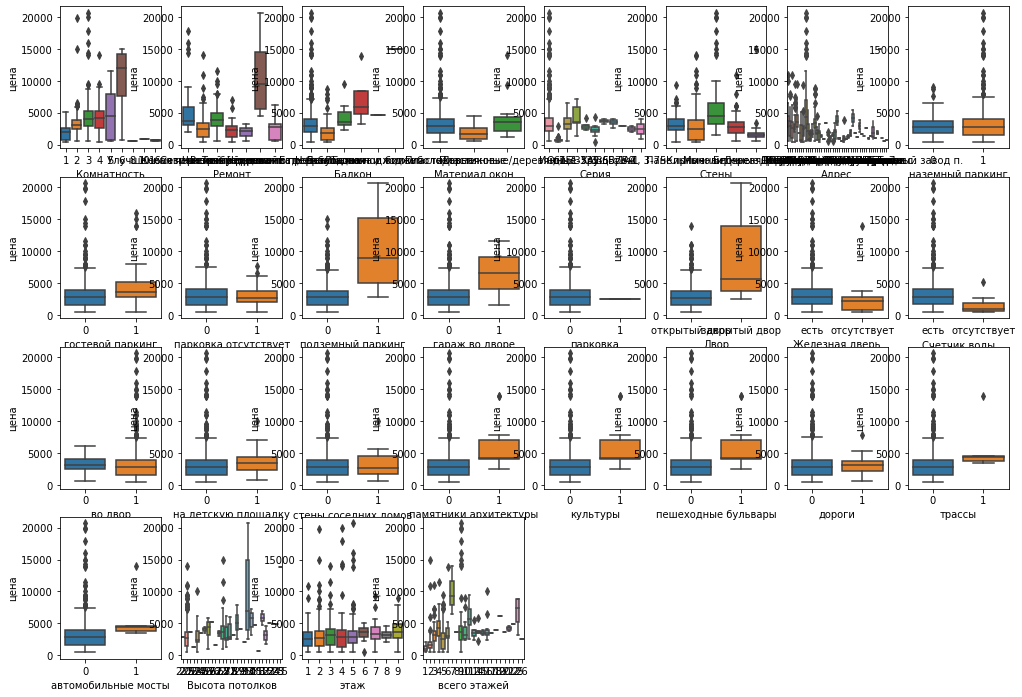

In [7]:
ncol = 1
plt.figure(figsize=(17,12))
for col in train.columns:
    if col in columns:
        continue
    plt.subplot(4, 8, ncol)
    sns.boxplot(data=train, x=col, y='цена')
    ncol += 1

### These aren`t flat, these are all rooms
There is some bias becouse of such thing existing, should delete it

In [8]:
idx_to_drop = train[(train['Комнатность'] > 1) & (train['Общая площадь'] < 26)].index # this are rooms, not flats
train.drop(index=idx_to_drop, inplace=True)
train.shape

(718, 31)

In [9]:
df.loc[4092393].url # do not drop this (I guess, it is flat after all)

'https://ptz.etagi.com//realty/4092393/'

In [10]:
ptz_address = ['Древлянка', 'Кукковка', 'Октябрьский', 'Голиковка', 
               'Перевалка', 'Центр', 'Ключевая', 'Зарека', 'Первомайский', 'Сулажгора']

In [11]:
# in address not in ptz, I will drop it anyway
idx_to_drop = train[(train['Общая площадь'] > 26) & (train['цена'] < 1000) & (train['Адрес'].isin(ptz_address))].index
idx_to_drop.drop(4092393)
train.drop(index=idx_to_drop, inplace=True)
train.shape

(712, 31)

# Input NaN
dropping column 'Год постройки' and dropping row contains NaN values shows worse result

#### Maybe I can handle somehow years?

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

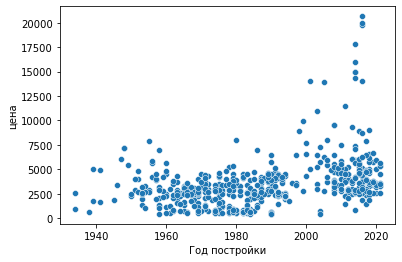

In [12]:
x=train['Год постройки']
y=train['цена']
sns.scatterplot(x=x,y=y)

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

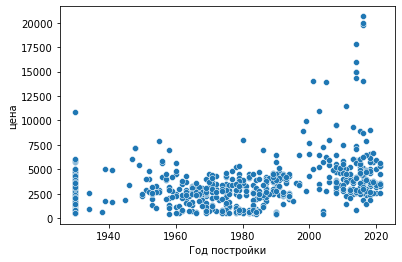

In [13]:
filled = x.fillna(1930) # just to see data on scatterplot with the rest of data
sns.scatterplot(x=filled, y=y)

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

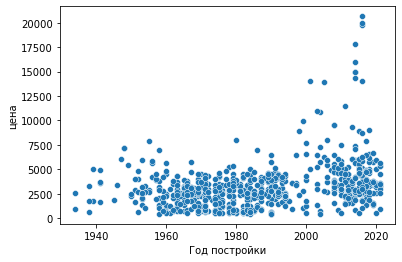

In [14]:
filled = x.fillna(method='bfill') # just to see data on scatterplot with the rest of data
sns.scatterplot(x=filled, y=y)

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

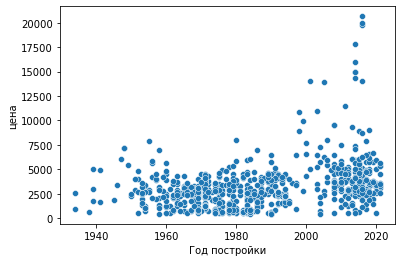

In [15]:
filled = x.fillna(method='ffill') # just to see data on scatterplot with the rest of data
sns.scatterplot(x=filled, y=y)

In [16]:
print((x>1996).sum())
(filled>1996).sum()

188


242

In [17]:
train.loc[5535905]

Комнатность                                 1
Ремонт                   Косметический ремонт
Балкон                            Нет балкона
Материал окон                     Пластиковые
Серия                                     Общ
Год постройки                             NaN
Стены                               Кирпичные
Адрес                               Голиковка
наземный паркинг                            0
гостевой паркинг                            1
парковка отсутствует                        0
подземный паркинг                           0
гараж во дворе                              0
парковка                                    0
Двор                            открытый двор
Железная дверь                           есть
Счетчик воды                      отсутствует
во двор                                     1
на детскую площадку                         0
стены соседних домов                        0
памятники архитектуры                       0
культуры                          

In [18]:
filled[5535905]

2017.0

## The problem is, that flat with (Серия == Общ) cannot be the year of 2017
So i need better way of imputting the missed values

#### imput values based on type of flat

In [19]:
filled = df['Год постройки'].fillna(df.groupby('Серия')['Год постройки'].transform('median'))

<AxesSubplot:xlabel='Год постройки', ylabel='цена'>

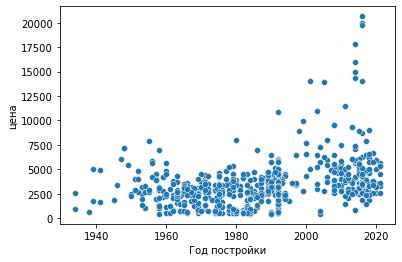

In [20]:
sns.scatterplot(x=filled, y=y)

In [21]:
filled_df = train.copy()
filled_df['Год постройки'] = filled

## Input one missed value
Though there is no real difference becouse of one row

In [22]:
median = filled_df['Высота потолков'].median()

In [23]:
filled_df['Высота потолков'].fillna(median, inplace=True)

In [24]:
filled_df.shape

(712, 31)

dropna should not change shape of df since I imputed all NaNs

In [25]:
filled_df = filled_df.dropna(axis=0)
filled_df.shape

(712, 31)

In [26]:
print((x>1996).sum())
(filled>1996).sum()

188


189

# Find important columns

In [27]:
def score_ANOVA(data, name):
    '''
    score ANOVA for all columns in data. Don`t perofm ANOVA test for col with name 'name'
    return 3 lists:    
    cols_with_big_p_value - p_value < 0.01;
    cols_with_small_p_value - p_value < 0.05;
    in other cases cols_that_need_further_investigation
    '''
    cols_that_need_further_investigation = []    
    cols_with_big_p_value = []
    cols_with_small_p_value = []
    for col in data.columns:
        if col == name:
            continue
        df = data[[col,'цена']]
        grouped_col_price = df.groupby([col],as_index=False)
        uniques_col_values = df[col].unique()
        if len(uniques_col_values) == 1:
            print(f'cols has only one value! ({col})')
            continue
        args = [grouped_col_price.get_group(uniques_col_values[i])['цена'] for i in range(len(uniques_col_values))]
        enough_samples = [args[i] for i in range(len(args)) # score ANOVA for groups that have at least 5 samples
                          if len(args[i]) >= 5]
        if len(enough_samples) < 2:
            print(f'{col} has not enough samples per group')
            continue
        f_val, p_val = stats.f_oneway(*enough_samples)
        #print('column name: ',col)
        #print( "ANOVA results: F=", f_val, ", P =", p_val)
        if p_val < 0.05:
            cols_with_small_p_value.append([col, f_val, p_val])
        elif p_val < 0.01:
            cols_with_big_p_value.append([col, f_val, p_val])
        else:
            cols_that_need_further_investigation.append([col, f_val, p_val])
    
    cols_with_big_p_value.sort(key=lambda x:x[2], reverse=True)
    cols_with_small_p_value.sort(key=lambda x:x[2], reverse=True)
    return cols_with_big_p_value, cols_with_small_p_value, cols_that_need_further_investigation

In [28]:
weak_p, strong_p, need_investigate =  score_ANOVA(filled_df, name='цена')

гараж во дворе has not enough samples per group
парковка has not enough samples per group


In [29]:
strong_p

[['трассы', 6.325766459666777, 0.012119364363364893],
 ['автомобильные мосты', 6.325766459666777, 0.012119364363364893],
 ['Материал окон', 7.006266532459412, 0.0009702757629233047],
 ['Счетчик воды', 13.58841264961971, 0.0002449335771600645],
 ['гостевой паркинг', 14.1800607316099, 0.00017987419281393168],
 ['памятники архитектуры', 14.903000554531541, 0.00012350619529324664],
 ['культуры', 14.903000554531541, 0.00012350619529324664],
 ['пешеходные бульвары', 14.903000554531541, 0.00012350619529324664],
 ['Балкон', 16.57219238043473, 9.274723077502964e-08],
 ['всего этажей', 8.701714116796884, 1.733281281911861e-13],
 ['Серия', 19.68286996280938, 2.731035394344149e-21],
 ['Стены', 32.32415887229759, 9.138397139437362e-25],
 ['Адрес', 10.461408140757927, 4.227730152375989e-25],
 ['Год постройки', 6.2735676222074925, 1.121221712180817e-27],
 ['Общая площадь', 13.220560774005751, 1.014379177330684e-29],
 ['Высота потолков', 33.94329473615298, 7.275560312339294e-36],
 ['Двор', 200.3573824

In [30]:
weak_p

[]

In [31]:
need_investigate

[['наземный паркинг', 2.661147532014957, 0.10326997908384336],
 ['парковка отсутствует', 3.3302358839725237, 0.06843716604451312],
 ['Железная дверь', 2.6154356877010363, 0.10627262271680697],
 ['во двор', 0.007134257098447874, 0.932710911606282],
 ['на детскую площадку', 0.8610206691564201, 0.3537685530200745],
 ['стены соседних домов', 0.09762276767936828, 0.7547930161805503],
 ['дороги', 0.002930747499827535, 0.956841737618592],
 ['этаж', 1.1910896997101172, 0.30149830841297354]]

In [32]:
cols = [col[0] for col in strong_p]
print(cols)

['трассы', 'автомобильные мосты', 'Материал окон', 'Счетчик воды', 'гостевой паркинг', 'памятники архитектуры', 'культуры', 'пешеходные бульвары', 'Балкон', 'всего этажей', 'Серия', 'Стены', 'Адрес', 'Год постройки', 'Общая площадь', 'Высота потолков', 'Двор', 'Комнатность', 'подземный паркинг', 'Ремонт']


# Find outliers

In [33]:
selected_columns = filled_df[cols]
selected_columns.shape

(712, 20)

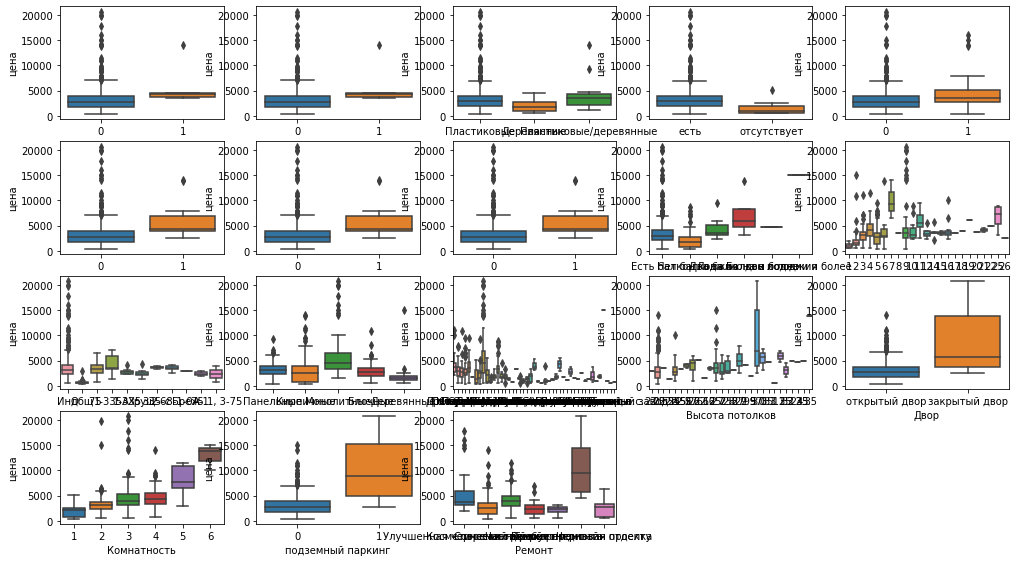

In [34]:
ncol = 1
plt.figure(figsize=(17,12))
for col in selected_columns:
    if col in columns:
        continue
    plt.subplot(5, 5, ncol)
    sns.boxplot(data=selected_columns, x=col, y=y)
    ncol += 1

In [35]:
y = pd.Series(df['цена'], index=selected_columns.index)

In [36]:
selected_columns = selected_columns.join(y)

In [37]:
Q1 = selected_columns.quantile(0.25)
Q3 = selected_columns.quantile(0.75)
IQR = Q3 - Q1
below_border = Q1 - 1.5*IQR
upper_border = Q3 + 1.5*IQR

In [38]:
below_border

трассы                      0.000
автомобильные мосты         0.000
гостевой паркинг            0.000
памятники архитектуры       0.000
культуры                    0.000
пешеходные бульвары         0.000
всего этажей               -1.000
Год постройки            1937.125
Общая площадь              -9.500
Высота потолков             2.500
Комнатность                -2.000
подземный паркинг           0.000
цена                    -1413.375
dtype: float64

In [39]:
upper_border

трассы                      0.000
автомобильные мосты         0.000
гостевой паркинг            0.000
памятники архитектуры       0.000
культуры                    0.000
пешеходные бульвары         0.000
всего этажей               15.000
Год постройки            2038.125
Общая площадь             106.500
Высота потолков             2.500
Комнатность                 6.000
подземный паркинг           0.000
цена                     7235.625
dtype: float64

In [40]:
idx_to_drop = selected_columns[selected_columns['цена'] > 7235.625].index
selected_columns.drop(index=idx_to_drop, inplace=True)
selected_columns.shape

(682, 21)

dropping all groups contains 'Общ' is no good

In [41]:
#idx_to_drop = selected_columns[selected_columns['Серия'] == 'Общ'].index
#selected_columns.drop(index=idx_to_drop, inplace=True)
#selected_columns.shape

### Do not drop other outliers
for some reasons, model perform better if I save this data

In [42]:
# idx_to_drop = selected_columns[selected_columns['Общая площадь'] > 106.5].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [43]:
# idx_to_drop = selected_columns[selected_columns['Высота потолков'] < 2.5].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [44]:
# idx_to_drop = selected_columns[selected_columns['всего этажей'] > 15].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [45]:
# idx_to_drop = selected_columns[selected_columns['Год постройки'] < 1937].index
# selected_columns.drop(index=idx_to_drop, inplace=True)
# selected_columns.shape

In [46]:
selected_columns['Адрес'].value_counts()

Древлянка                          97
Кукковка                           78
Октябрьский                        66
Голиковка                          65
Перевалка                          62
Центр                              57
Ключевая                           50
Зарека                             49
Первомайский                       33
Сулажгора                          22
Кондопога                          16
5-й посёлок                         7
Соломенное                          7
Мелиоративный п.                    7
Новая Вилга п.                      6
Деревянка п.                        6
Железнодорожный                     6
Эссойла с.                          5
Кончезеро с.                        4
Университетский городок             3
Великая губа с.                     3
Птицефабрика                        3
Шуя п.                              3
Чална                               2
Вилга д.                            2
Сайнаволок                          2
Старая Кукко

In [47]:
idx_to_drop_replace = selected_columns.groupby('Адрес', as_index=False).filter(lambda x: len(x) < 17).index
adress_drop_df = selected_columns.drop(index=idx_to_drop_replace)

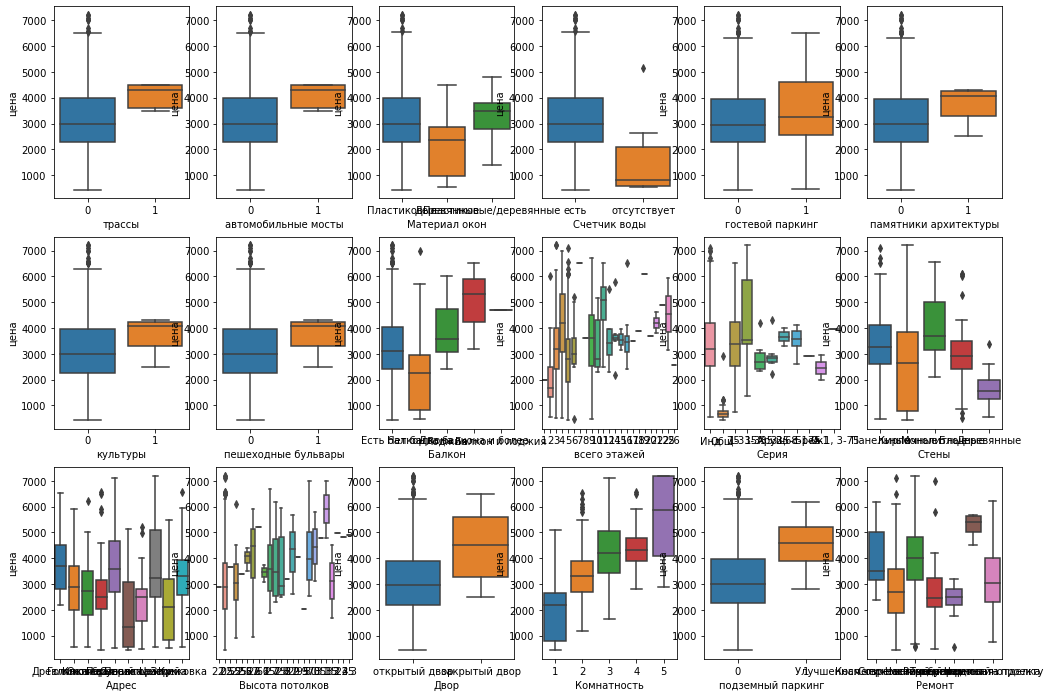

In [48]:
ncol = 1
plt.figure(figsize=(17,12))
for col in adress_drop_df:
    if col in columns:
        continue
    plt.subplot(3, 6, ncol)
    sns.boxplot(data=adress_drop_df, x=col, y=adress_drop_df['цена'])
    ncol += 1

<AxesSubplot:xlabel='Адрес', ylabel='цена'>

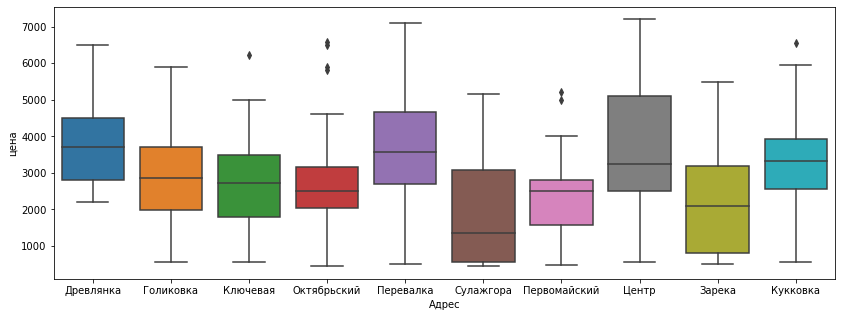

In [49]:
plt.figure(figsize=(14,5))
sns.boxplot(x=adress_drop_df['Адрес'], y=adress_drop_df['цена'])

In [50]:
adress_drop_df.shape

(579, 21)

# Prepare data

In [51]:
X = adress_drop_df.drop(columns=['цена'])
y = adress_drop_df['цена']
print(X.shape)
print(y.shape)

(579, 20)
(579,)


In [52]:
X_year_bins = X.copy()

## Binarizing year of building

In [53]:
def best_bin_split(n):
    model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=8)
    best_score = float('-inf')
    best_bin_split = 0
    best_params = None
    for n_bins in range(2,n):
        bins = np.linspace(X['Год постройки'].min(), X['Год постройки'].max(), n_bins) # 5
        year = pd.cut(X['Год постройки'], bins=bins)
        X_year_bins['Год постройки'] = year
        X_dummy = pd.get_dummies(X_year_bins)
        estimator = DecisionTreeRegressor()
        params = {'max_depth': [None,4,5,6,7,8,9],
                  'min_samples_split':[n for n in range(2,10)],
                  'min_samples_leaf' : [i for i in range(1,10)],
                  'random_state' : [42],
                  'min_samples_leaf': [n for n in range(1,10)],
                  'max_features':[n_features/10 for n_features in range(1,11)],
                 }
        #grid = GridSearchCV(estimator, params, verbose=True)
        #grid.fit(X_dummy, y)
        #model = DecisionTreeRegressor(**grid.best_params_)
        score = cross_val_score(model, X_dummy, y, cv=4)
        if score.mean() > best_score:
            best_score = score.mean()
            best_bin_split = n_bins
            #best_params = grid.best_params_
    return best_score, best_bin_split

In [54]:
score, bin_split = best_bin_split(8)

In [55]:
score

0.7489664255890363

In [56]:
bin_split

5

In [57]:
bins = np.linspace(X['Год постройки'].min(), X['Год постройки'].max(), 5) # 5
year = pd.cut(X['Год постройки'], bins=bins)
X_year_bins['Год постройки'] = year

There is no need to create bins for areas, model shows worse perfomance

In [58]:
#bins = np.linspace(X['Общая площадь'].min(), X['Общая площадь'].max(), 11) # 5
#year = pd.cut(X['Общая площадь'], bins=bins)
#X_year_bins['Общая площадь'] = year

# building model

In [59]:
X_dummy = pd.get_dummies(X_year_bins)

In [60]:
X_dummy.shape

(579, 60)

In [61]:
estimator = DecisionTreeRegressor()
params = {'max_depth': [None,3,4,5,6,7,8,9,10,15,17,20],
         'min_samples_split':[n for n in range(2,10)],
          'min_samples_leaf' : [i for i in range(1,10)],
          'random_state' : [42],
         'min_samples_leaf': [n for n in range(1,10)],
         'max_features':[n_features/10 for n_features in range(1,11)]}

In [62]:
grid = GridSearchCV(estimator, params, verbose=True)

In [63]:
grid.fit(X_dummy, y)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17,
                                       20],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [42]},
             verbose=True)

In [64]:
best_params = grid.best_params_
best_params

{'max_depth': 7,
 'max_features': 0.6,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'random_state': 42}

In [65]:
model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=8)

In [66]:
model = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_leaf=4, min_samples_split=9) # 9?
#model = RandomForestRegressor(random_state=42, max_depth=13)

In [67]:
model = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=5, min_samples_split=2,max_features=0.9)

In [68]:
model = DecisionTreeRegressor(**best_params)

In [69]:
score = cross_val_score(model, X_dummy, y, cv=5)
score.mean()

0.8043644276490832

In [70]:
score

array([0.78321492, 0.79495593, 0.86219007, 0.76474402, 0.81671721])

In [71]:
score

array([0.78321492, 0.79495593, 0.86219007, 0.76474402, 0.81671721])

Best result so  far

In [72]:
preds = cross_val_predict(model, X_dummy, y, cv=5)

In [73]:
mean_squared_error(preds, y)

435061.9819309202

In [74]:
mean_absolute_error(preds, y)

463.7029694313798

In [75]:
residuals = preds - y

In [76]:
np.sqrt(mean_squared_error(preds, y))

659.5922846205224

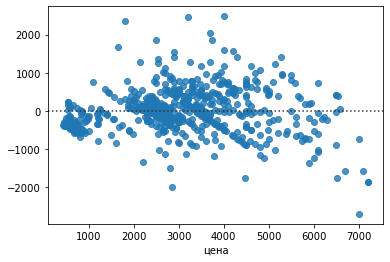

In [77]:
graph = sns.residplot(x=y, y=preds)
#graph.axhline(795,color='red')
#graph.axhline(-501,color='red')

Text(0.5, 6.79999999999999, 'residuals')

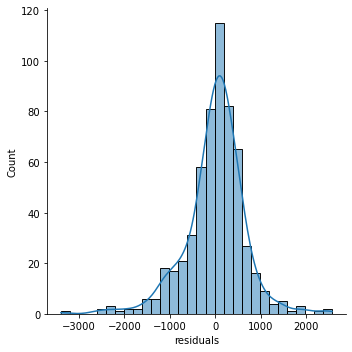

In [78]:
sns.displot(residuals, bins=30, kde=True)
plt.xlabel('residuals')

In [79]:
y.iloc[:25]

Код объекта
5757236    2390.0
5535905     920.0
4644398    3250.0
5667276    3590.0
4644417    4500.0
3854655    2550.0
5757173    3000.0
5103276     800.0
5758058    4700.0
4525390    2970.0
4469870    4000.0
5760725    2450.0
5553000     570.0
4265258    4200.0
2987059    1190.0
5759101    2700.0
3598170    1999.0
5109065    3200.0
5758617    5500.0
5593171     649.0
5751111    4000.0
5760211    2350.0
3602019     590.0
4522037     700.0
3684339     990.0
Name: цена, dtype: float64

In [80]:
preds[:25]

array([2859.625     ,  723.25      , 4494.45      , 3284.28571429,
       5072.25      , 3907.        , 3474.38333333,  723.25      ,
       5216.66666667, 3474.38333333, 5016.5       , 2471.09836066,
        723.25      , 4011.47368421, 1184.28571429, 2471.09836066,
       1583.84615385, 3474.38333333, 5072.25      ,  575.71428571,
       3474.38333333, 2859.625     ,  723.25      ,  818.625     ,
       1184.28571429])

[Text(2668.4940159574467, 1274.0625, 'Серия_Общ <= 0.5\nmse = 2247012.882\nsamples = 579\nvalue = 3068.313'),
 Text(1419.1156914893618, 1104.1875, 'Общая площадь <= 48.65\nmse = 1625005.657\nsamples = 504\nvalue = 3417.661'),
 Text(567.6462765957447, 934.3125, 'Общая площадь <= 28.6\nmse = 579821.212\nsamples = 246\nvalue = 2561.154'),
 Text(311.6489361702128, 764.4375, 'Общая площадь <= 25.15\nmse = 498565.259\nsamples = 23\nvalue = 1299.957'),
 Text(222.6063829787234, 594.5625, 'mse = 339400.596\nsamples = 15\nvalue = 1023.933'),
 Text(400.6914893617021, 594.5625, 'mse = 386293.75\nsamples = 8\nvalue = 1817.5'),
 Text(823.6436170212766, 764.4375, 'Стены_Деревянные <= 0.5\nmse = 407226.394\nsamples = 223\nvalue = 2691.233'),
 Text(578.7765957446809, 594.5625, 'Ремонт_Современный ремонт <= 0.5\nmse = 318106.014\nsamples = 206\nvalue = 2784.252'),
 Text(356.17021276595744, 424.6875, 'Год постройки_(1999.25, 2021.0] <= 0.5\nmse = 215478.492\nsamples = 162\nvalue = 2650.802'),
 Text(178.0

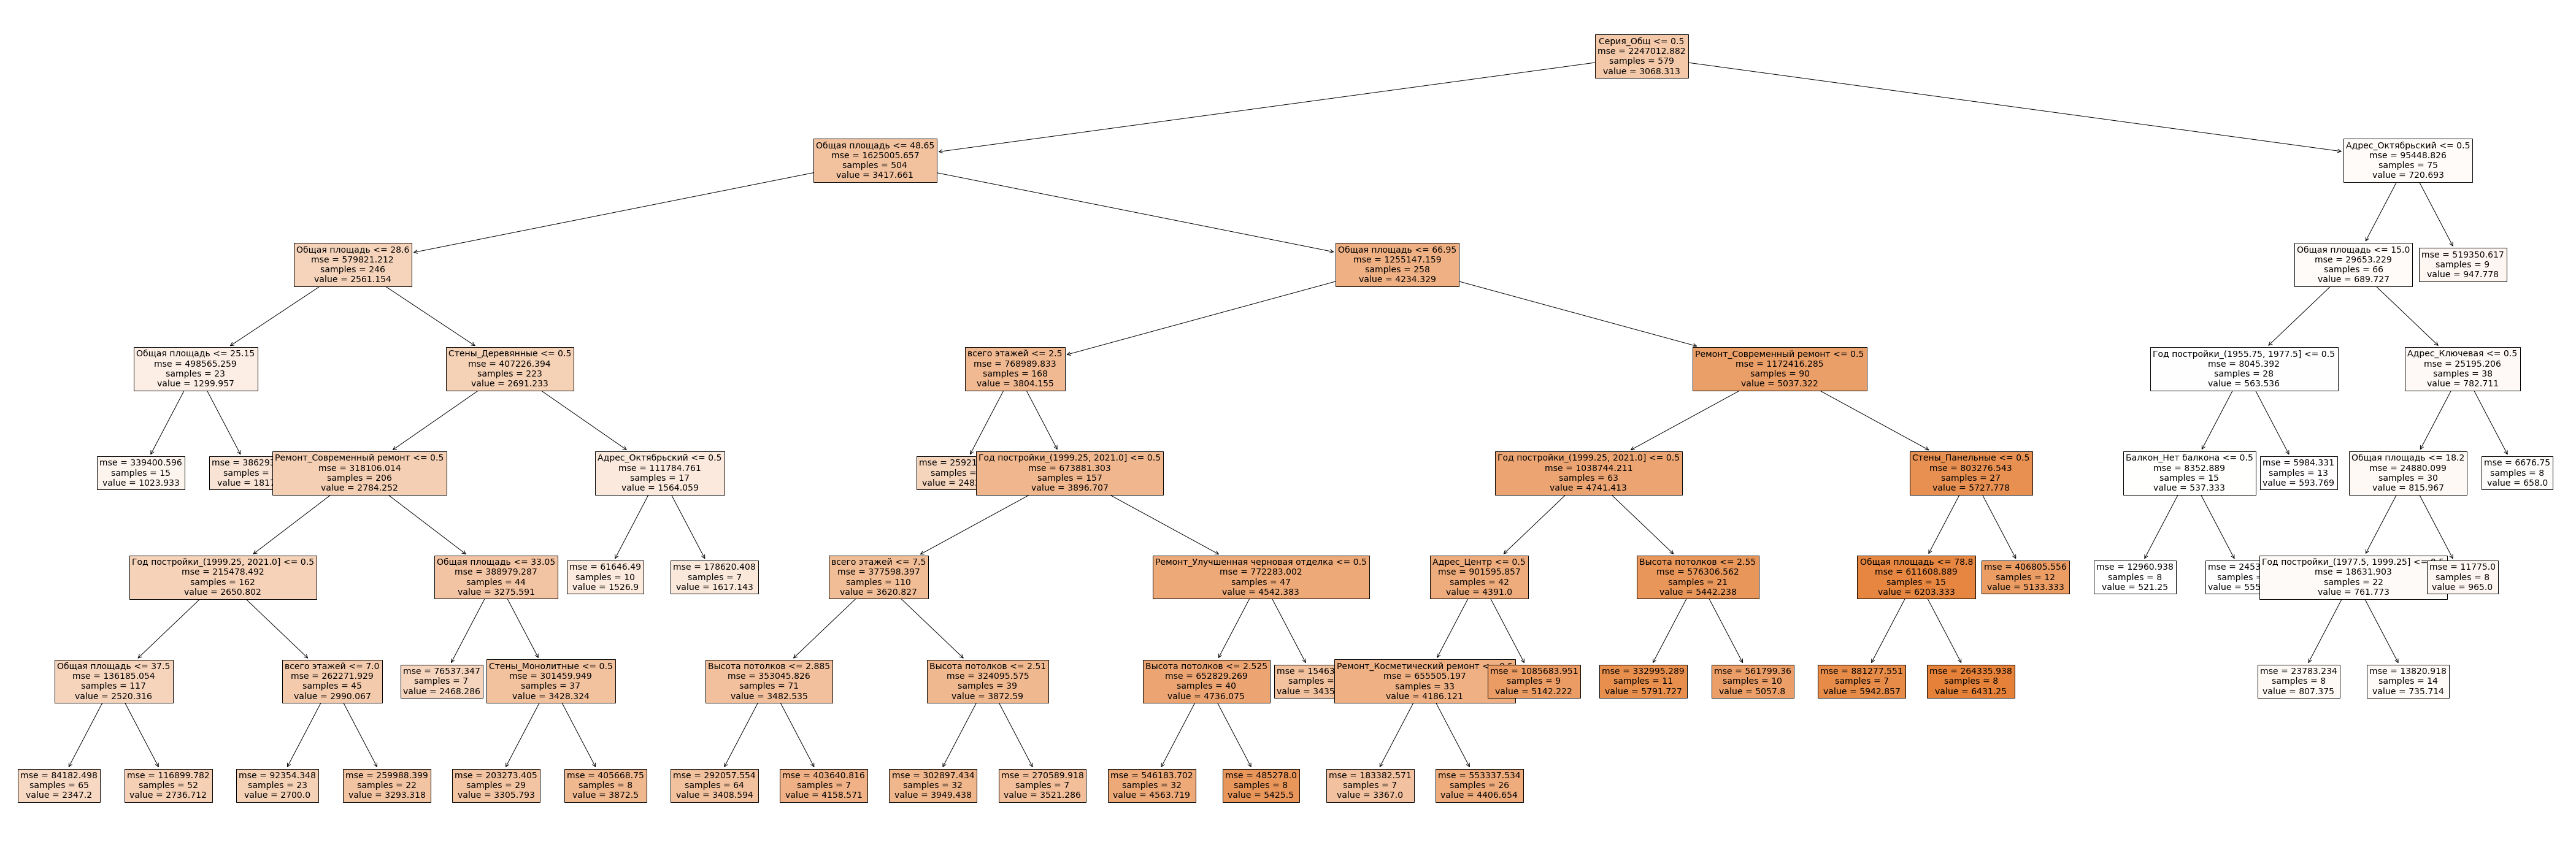

In [81]:
plt.figure(figsize=(75,25))
model.fit(X_dummy,y)
plot_tree(model, feature_names=X_dummy.columns, filled=True, fontsize=14)

## Checking dummmy predictions
predict price based on flat_type

In [82]:
means = X.join(y).groupby('Серия')['цена'].mean()
means

Серия
1-335         2871.428571
1-335А        4342.500000
2-68-1-0      3490.000000
335-с         3652.500000
75            3449.758065
75.1, 3-75    3949.000000
А-1           2455.000000
Бреж          2920.000000
Инд           3413.751843
Общ            720.693333
Хрущ          2934.285714
Name: цена, dtype: float64

In [83]:
dummy_preds = X['Серия'].transform(lambda x: means[x]).values

In [84]:
mean_squared_error(dummy_preds,y)

1403962.814156493

In [85]:
mean_absolute_error(dummy_preds,y)

888.1138730402912

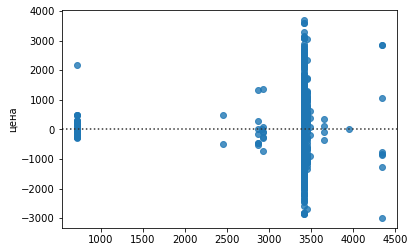

In [86]:
graph = sns.residplot(x=dummy_preds, y=y)


In [87]:
residuals_dummy = dummy_preds - y

Text(0.5, 6.79999999999999, 'residuals')

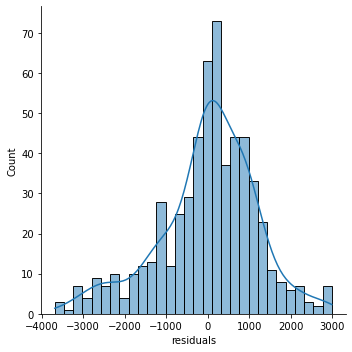

In [88]:
sns.displot(residuals_dummy, bins=30, kde=True)
plt.xlabel('residuals')